# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [18]:
data = pd.read_csv('project_clus_fix.csv')
data

,Annual Income,Company,Model,Price ($),Body Style,Cluster
0,13500,8,60,26000,3,0
1,1480000,7,52,19000,3,1
2,1035000,4,57,31500,2,3
3,13500,27,36,14000,3,0
4,1465000,0,141,24500,1,1
...,...,...,...,...,...,...
23901,13500,21,150,12000,2,0
23902,900000,5,109,16000,0,3
23903,705000,2,4,21000,4,3
23904,13500,5,93,31000,2,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [19]:
X = data.drop(columns="Cluster")
y = data["Cluster"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print(f"Training shape set: X_train= {X_train.shape}, y_train= {y_train.shape}")
print(f"Testing shape set: X_test= {X_test.shape}, y_test= {y_test.shape}")

Training shape set: X_train= (19124, 5), y_train= (19124,)
Testing shape set: X_test= (4782, 5), y_test= (4782,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [20]:
knn = KNeighborsClassifier().fit(X_train,y_train)
rf = RandomForestClassifier().fit(X_train,y_train)


Algoritma yang digunakan untuk membangun model ini adalah algoritma K-Nearest Neighbors (KNN) dan algoritma Random Forest

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

**Evaluasi Trainin Set**

In [21]:
X = X_train
y = y_train

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    results = {
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred, average='micro'),
        'Recall': recall_score(y, y_pred, average='micro'),
        'F1-Score': f1_score(y, y_pred, average='micro')
    }
    return results

results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X, y),
    'Random Forest (rf)': evaluate_model(rf, X, y)
}

summary_data_train = pd.DataFrame(columns=["Model","Accuracy","Precision","Recall","F1-Score"])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_data_train = pd.DataFrame(rows)

summary_data_train

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors (KNN),0.999582,0.999582,0.999582,0.999582
1,Random Forest (rf),1.000000,1.000000,1.000000,1.000000


**Evaluasi Testing Set**

In [22]:
X = X_test
y = y_test

results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X, y),
    'Random Forest (rf)': evaluate_model(rf, X, y)
}

summary_data_test = pd.DataFrame(columns=["Model","Accuracy","Precision","Recall","F1-Score"])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_data_test = pd.DataFrame(rows)

summary_data_test

,Model,Accuracy,Precision,Recall,F1-Score
0,K-Nearest Neighbors (KNN),0.999791,0.999791,0.999791,0.999791
1,Random Forest (rf),0.999582,0.999582,0.999582,0.999582


**Confusion Matrix Random Forest**

In [23]:
y_pred_rf = rf.predict(X_test)
y_pred_knn = knn.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)

cm_knn = confusion_matrix(y_test, y_pred_knn)

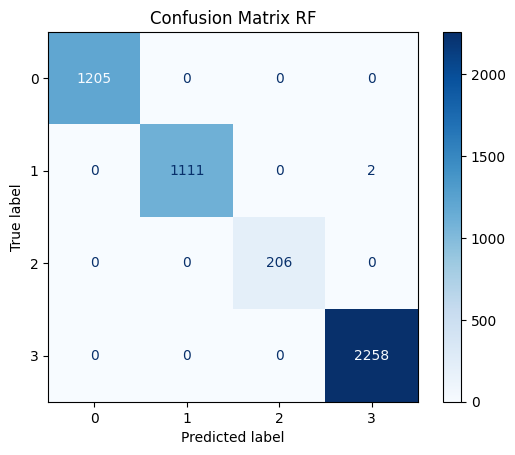

In [24]:
cm_display_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
cm_display_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix RF")
plt.show()

**Confusion Matrix K-Nearest Neighbors**

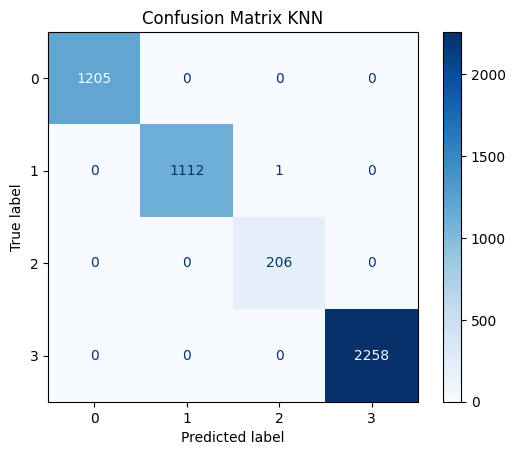

In [25]:
cm_display_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
cm_display_knn.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix KNN")
plt.show()

**Memeriksa Overfitting dan Underfitting**

In [26]:
y_pred_rf_test = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)
y_pred_knn_test = knn.predict(X_test)
y_pred_knn_train = knn.predict(X_train)

train_rf_mse = mean_squared_error(y_train, y_pred_rf_train)
test_rf_mse = mean_squared_error(y_test, y_pred_rf_test)
train_knn_mse = mean_squared_error(y_train, y_pred_knn_train)
test_knn_mse = mean_squared_error(y_test, y_pred_rf_test)

print(f"RF Training MSE: {train_rf_mse}")
print(f"RF Testing MSE: {test_rf_mse}")
print(f"KNN Training MSE: {train_knn_mse}")
print(f"KNN Testing MSE: {test_rf_mse}")

RF Training MSE: 0.0
RF Testing MSE: 0.001672940192388122
KNN Training MSE: 0.0024053545283413513
KNN Testing MSE: 0.001672940192388122


## **c. Analisis Hasil Evaluasi Model Klasifikasi**

Hasil Evaluasi K-Nearest Neighbors (KNN):
Training Set:
* Accuracy: 0.999582
* Precision: 0.999582
* Recall: 0.999582
* F1-Score: 0.999582
* Training MSE: 0.0024053545283413513

Testing Set:
* Accuracy: 0.999791
* Precision: 0.999791
* Recall: 0.999791
* F1-Score: 0.999791
* Confusion Matrix: terdapat satu kesalahan prediksi
* Testing MSE: 0.001672940192388122

Hasil Evaluasi Random Forest (RF):
Training Set:
* Accuracy: 1.000000
* Precision: 1.000000
* Recall: 1.000000
* F1-Score: 1.000000
* Training MSE: 0.0

Testing Set:
* Accuracy: 0.999582
* Precision: 0.999582
* Recall: 0.999582
* F1-Score: 0.999582
* Confusion Matrix: terdapat dua kesalahan prediksi
* Testing MSE: 0.001672940192388122

Berdasarkan hasil evaluasi tersebut, model yang dihasilkan oleh algoritma K-Nearest Neighbors dan algoritma Random Forest tidak mengalami overfitting maupun underfitting. Hal tersebut dibuktikan dengan nilai training MSE dan Testing MSE masing-masing model yang tidak memiliki selisih yang banyak. Selain itu, kedua model tersebut juga memiliki nilai Accuracy, Precision, Recall, dan F1-Score yang sangat memuaskan. Jika dibandingkan, K-Nearest Neighbors unggul dengan selisih yang sangat kecil dibanding Random Forest. Namun, jika melihat hasil dari confusion matrix K-Nearest Neighbors hanya memiliki satu kesalahan prediksi dan Random Forest memiliki dua kesalahan prediksi. Hal itu hanyalah nilai selisih yang kecil tapi dengan begitu membuat lebih jelas bahwa Model yang paling optimal adalah model K-Nearest Neighbors.

